<h2>JSON Reader</h2>
<p>JSON is taken from finance.yahoo.com and is converted into easily transformable data structure
<p>

In [27]:
import json
import os
import datetime
import pandas as pd
import numpy

<h2>Helper Functions</h2>
<li>print_array</li>
<li>load_data</li>
<li>UTC_milisecond_to_datetime</li>
<li>extract_dataset</li>

In [90]:
def print_array(list):
    for x in list:
        print(x, end='|type is ')
        print(type(x))

def load_data():
    filename = os.getcwd() + '/market-price-2.json'

    f = open(filename)
    data = json.load(f)
    
    return data

def UTC_milisecond_to_datetime(time_price_dictionary):
    formatted_dataset = []
    creation_date = {'x':datetime.datetime(2008, 8 , 18, 0, 0),'y':0}
    next_hdate = {'x':datetime.datetime(2024, 3, 27, 0, 0),'y':0}

    formatted_dataset.append(creation_date)
    for dictionary in time_price_dictionary:
        dictionary['x'] = (datetime.datetime.fromtimestamp(dictionary['x']/1000.0))
        formatted_dataset.append(dictionary)

    formatted_dataset.append(next_hdate)

    return formatted_dataset

def pandas_test(JSON_to_plot):
    df = pd.DataFrame(JSON_to_plot)
    #print (df)
    df.plot(x='x', y='y', logy=True)

def halving(formatted_dataset):
    hdates = [datetime.datetime(2012, 11, 28, 0, 0), datetime.datetime(2016, 7, 9, 0, 0), datetime.datetime(2020, 5, 11, 0, 0)]
    d_index = 0
    h_index = 0
    halved_dataset = []
    df = pd.DataFrame(formatted_dataset)
    for index, row in df.iterrows():
        if d_index!= len(hdates) and hdates[d_index] < row['x']:
            #print('Halving date reached or exceeded, incrementing halving date counter. Currently at halving date number ' +str(d_index+1)+' '+ str(hdates[d_index]))
            d_index+=1
            halved_dataset.append(df.iloc[h_index:index])
            h_index = index
    halved_dataset.append(df.iloc[h_index:])
    return halved_dataset
    

<h2> Main Functions </h2>
<p>Things to implement...</p>
<p><s>plot the whole data set</s> : pandas_test</p>
<p>ability to divide the dataset by halving dates</p>

<h3>Execution

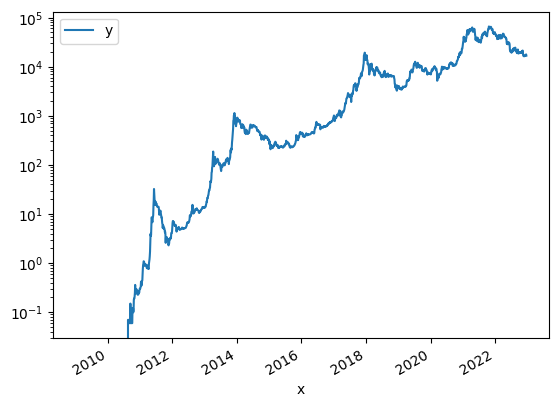

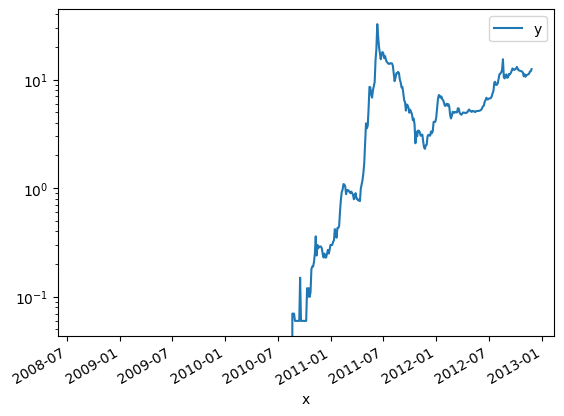

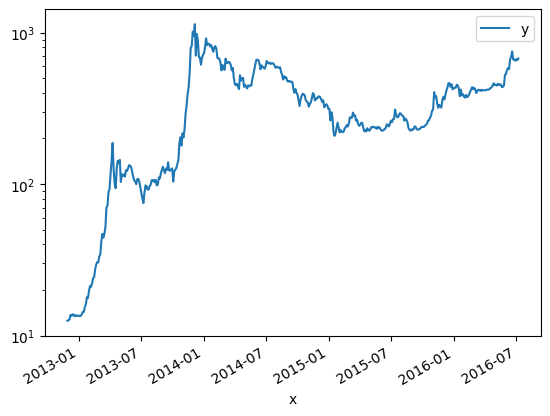

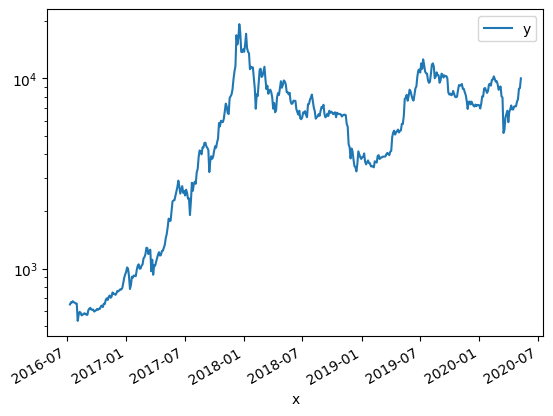

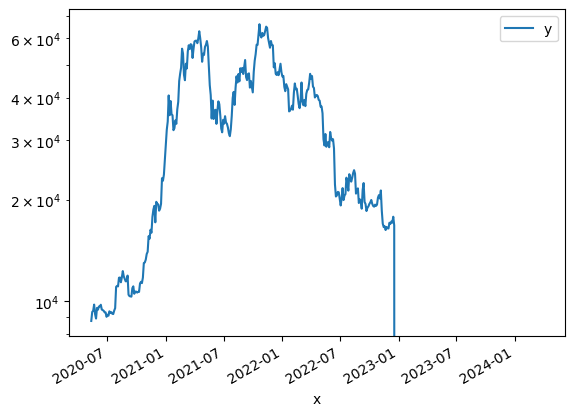

In [91]:
data = load_data()

formatted_dataset = UTC_milisecond_to_datetime(data['market-price'])
halved_dataset = halving(formatted_dataset)
pandas_test(data['market-price'])
for dataset in halved_dataset:
    pandas_test(dataset)

In [53]:
df = pd.DataFrame(data['market-price'])